# Paso Severino frequency analysis 
#### Jose Valles (jose.valles.leon@gmail.com)

In [36]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

from IPython.display import HTML

sns.set()

In [37]:
# Quantile Function Definitions
def q1(x):
    return x.quantile(0.28)

def q2(x):
    return x.median()

def q3(x):
    return x.quantile(0.72)

def q80(x):
    return x.quantile(0.80)

def q90(x):
    return x.quantile(0.90)

In [38]:
variable_name = 'niveles'
STAGE_DAILY = pd.read_csv(f'data/{variable_name}_ps.csv',parse_dates=['FECHA'],index_col="FECHA",dayfirst=False,na_values="NA")

In [39]:
# Identify the missing data from a date range (1980 to 2023)
STAGE_DAILY_date_missing = pd.date_range(start = STAGE_DAILY.index[0].strftime('%Y-%m-%d'), end = STAGE_DAILY.index[-1].strftime('%Y-%m-%d'),freq='D')
# DISCHARGE_DAILY_date_missing = pd.date_range(start = '1980-01-01', end = '2023-02-28',freq='D')
# Re-index the dataframe based on the missind date variable
STAGE_DAILY = STAGE_DAILY.reindex(STAGE_DAILY_date_missing,fill_value=None)
# Set index Fecha
STAGE_DAILY.index.name = 'date' 
# Change columns names
STAGE_DAILY.columns = ['stage']
STAGE_DAILY['year'] = STAGE_DAILY.index.year
STAGE_DAILY['month'] = STAGE_DAILY.index.month
STAGE_DAILY['monthday'] = STAGE_DAILY.index.day_of_year
# Print the last 6 values
HTML(STAGE_DAILY.tail(6).to_html())

,stage,year,month,monthday
date,,,,
2021-11-21,36.00,2021,11,325
2021-11-22,35.98,2021,11,326
2021-11-23,35.96,2021,11,327
2021-11-24,35.96,2021,11,328
2021-11-25,35.94,2021,11,329
2021-11-26,35.94,2021,11,330


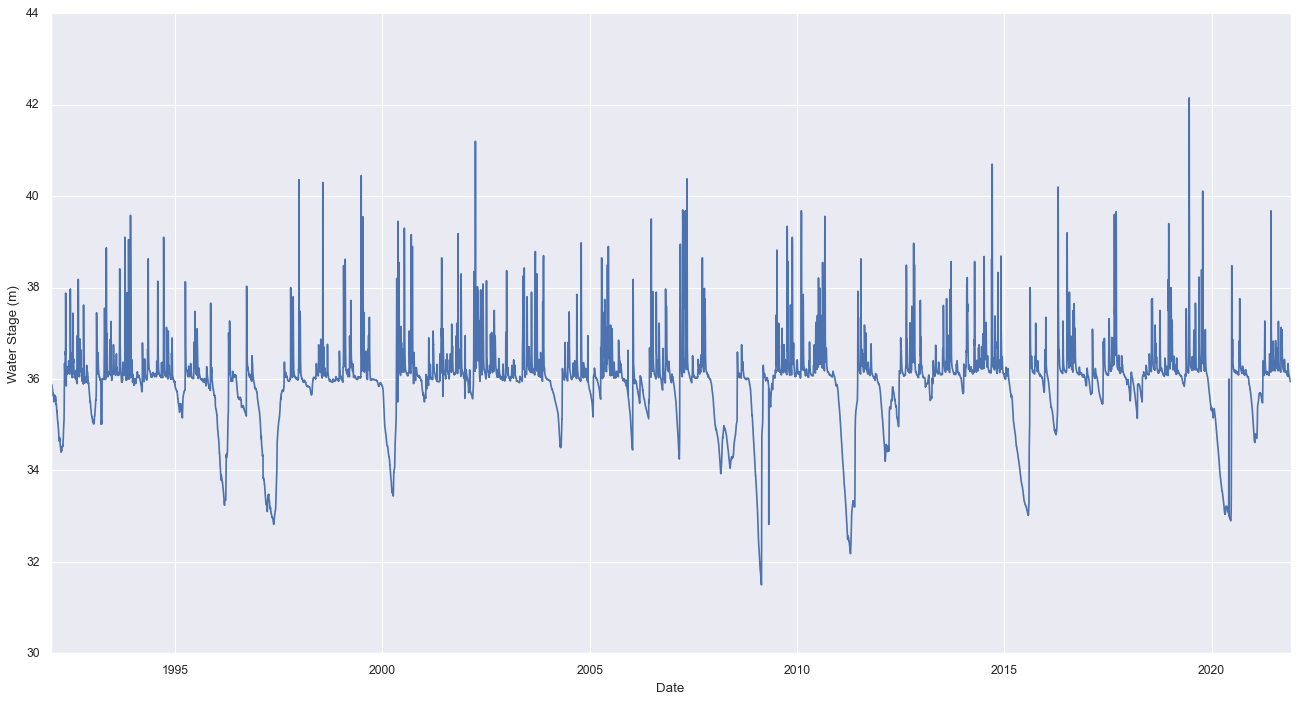

In [40]:
ax1 = STAGE_DAILY['stage'].plot(figsize=(20, 10));
ax1.set_xlabel('Date');
ax1.set_ylabel('Water Stage (m)');

In [41]:
desired_months = [12,1,2,3]
mask = STAGE_DAILY['month'].isin(desired_months)

selected_stage = STAGE_DAILY[mask]

In [42]:
HTML(selected_stage.tail(6).to_html())

,stage,year,month,monthday
date,,,,
2021-03-26,35.82,2021,3,85
2021-03-27,35.98,2021,3,86
2021-03-28,36.30,2021,3,87
2021-03-29,36.40,2021,3,88
2021-03-30,36.35,2021,3,89
2021-03-31,36.28,2021,3,90


In [43]:
sorted_stage= selected_stage['stage'].sort_values(ascending=False)
freq_stage = np.arange(1., len(sorted_stage) + 1) / len(sorted_stage)

df_freq = sorted_stage.to_frame(name='stage')
df_freq['frequency'] = freq_stage

In [44]:
HTML(df_freq.tail(6).to_html())

,stage,frequency
date,,
2009-02-17,31.63,0.998614
2009-02-18,31.59,0.998891
2009-02-19,31.56,0.999168
2009-02-20,31.51,0.999446
2009-02-21,31.51,0.999723
2009-02-22,31.50,1.000000


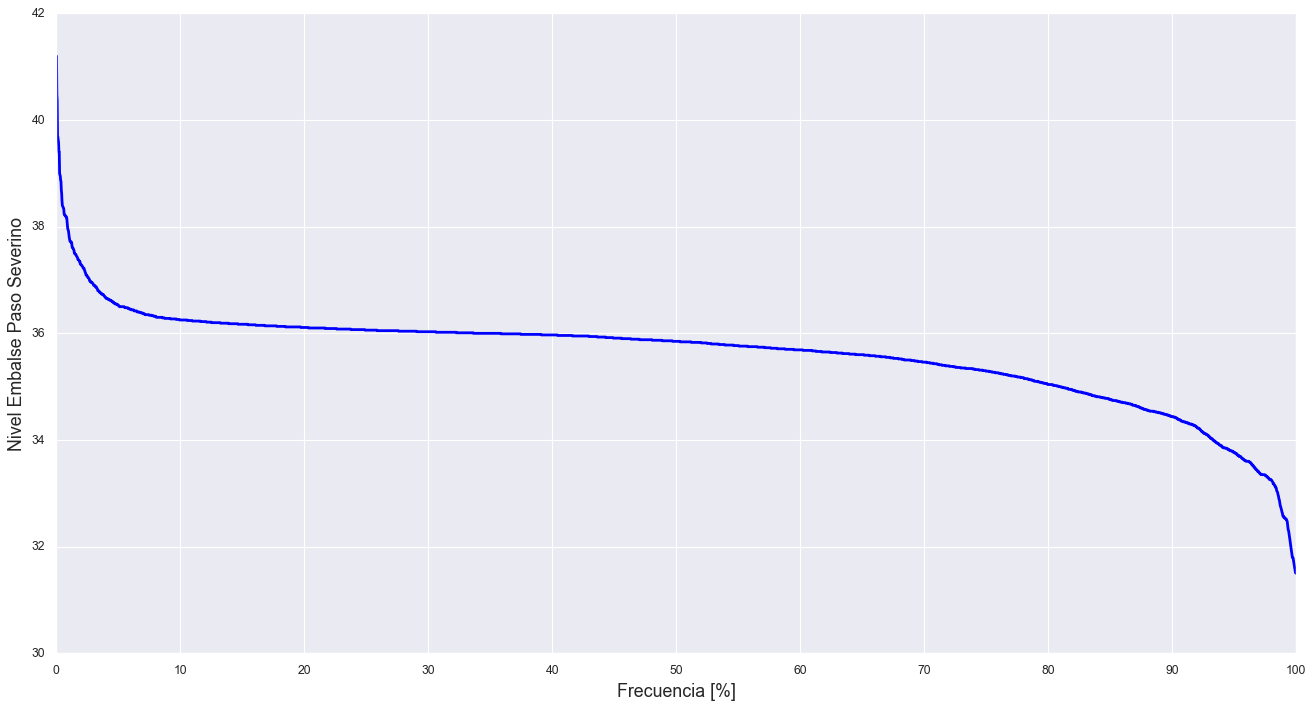

In [45]:
plt.figure(figsize=(20, 10))
plt.plot(freq_stage*100, sorted_stage,color='blue',linewidth=2.5);

plt.xticks([0,10,20,30,40,50,60,70,80,90,100],labels=['0','10','20','30','40','50','60','70','80','90','100']);
plt.xlabel('Frecuencia [%]',fontsize=16);
plt.ylabel('Nivel Embalse Paso Severino',fontsize=16);

In [46]:
min_stage = np.min(selected_stage['stage'])
max_stage = np.max(selected_stage['stage'])

print(f"The minimum value in 4-month period (december-march) is: {min_stage:.2f} meters")
print(f"The maximum value in 4-month period (december-march) is: {max_stage:.2f} meters")

The minimum value in 4-month period (december-march) is: 31.50 meters
The maximum value in 4-month period (december-march) is: 41.20 meters


In [47]:
p_value = 0.28
p_stage = selected_stage['stage'].quantile(p_value)

print(f"the {round(p_value*100,0)}-th percentile is: {p_stage:.2f} meters")

the 28.0-th percentile is: 35.39 meters


In [48]:
q72 = selected_stage['stage'].quantile(0.72)
q28 = selected_stage['stage'].quantile(0.28)

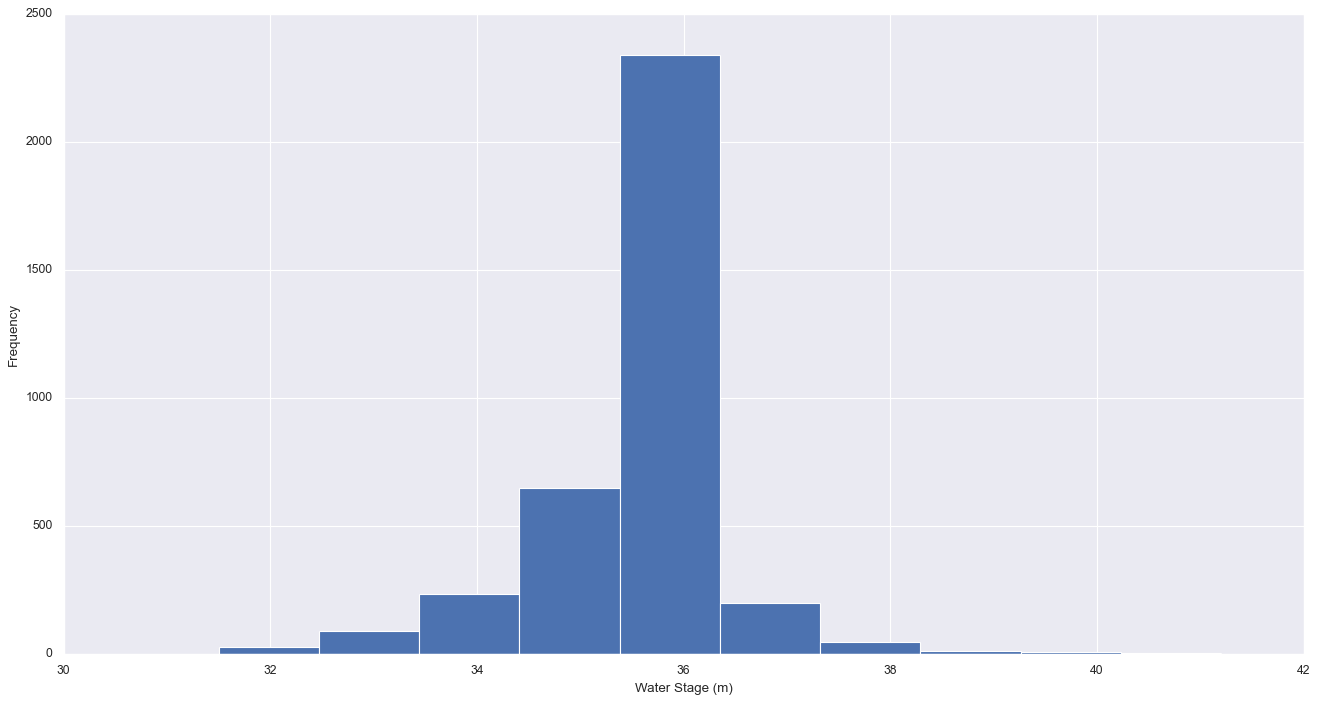

In [49]:
ax2 = selected_stage['stage'].hist(figsize=(20, 10));
# ax2.set_xlim(-3.0,3.0)
ax2.set_xlabel('Water Stage (m)');
ax2.set_ylabel('Frequency');

In [50]:
cdf = selected_stage['stage'].value_counts(normalize=True).sort_index().cumsum()
threshold = 0.20
stage_80_percent = cdf[cdf>=threshold].index[0]

print(f"The stage value at {round(threshold*100,0)}% frequency is {stage_80_percent:.2f} meters")

The stage value at 20.0% frequency is 35.04 meters


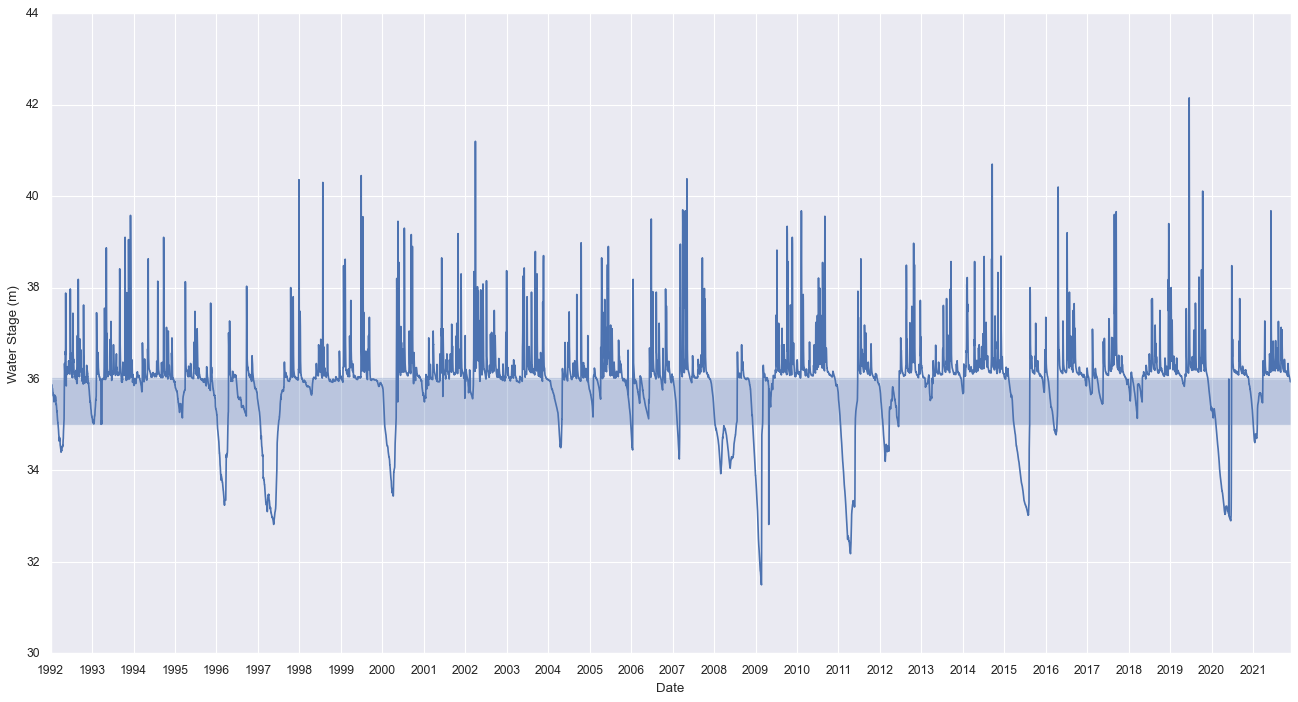

In [54]:
from matplotlib import dates

ax3 = STAGE_DAILY['stage'].plot(figsize=(20, 10));
ax3.set_xlabel('Date');
ax3.set_ylabel('Water Stage (m)');
ax3.fill_between(STAGE_DAILY.index, 35, q72,alpha=0.3);

ax3.xaxis.set_major_locator(dates.YearLocator(1))   #to get a tick every 1 month
ax3.xaxis.set_major_formatter(dates.DateFormatter('%Y'))   #optional formatting 